In [1]:
# Import lib yg diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data Collection
#mengimpor dataset dan menyimpan dalam dataframe
path = "..\Dataset\API_Kaggle\loan_approval.csv"
df = pd.read_csv(path)
df

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,True
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,False
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,True
1998,Jason Price,Adamland,139022,360,24031,35,55.0,False


In [3]:
df.isna().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [8]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


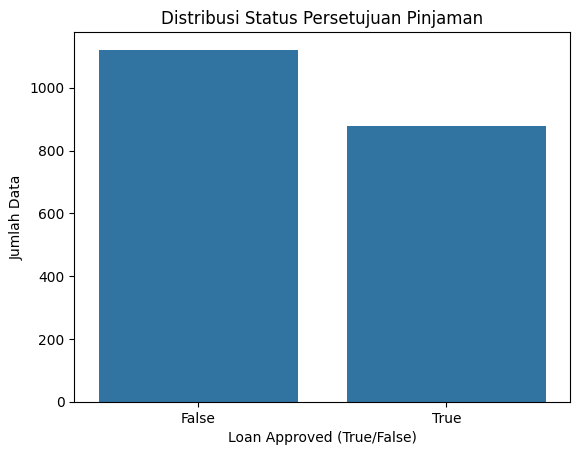

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_approved', data=df)
plt.title('Distribusi Status Persetujuan Pinjaman')
plt.xlabel('Loan Approved (True/False)')
plt.ylabel('Jumlah Data')
plt.show()

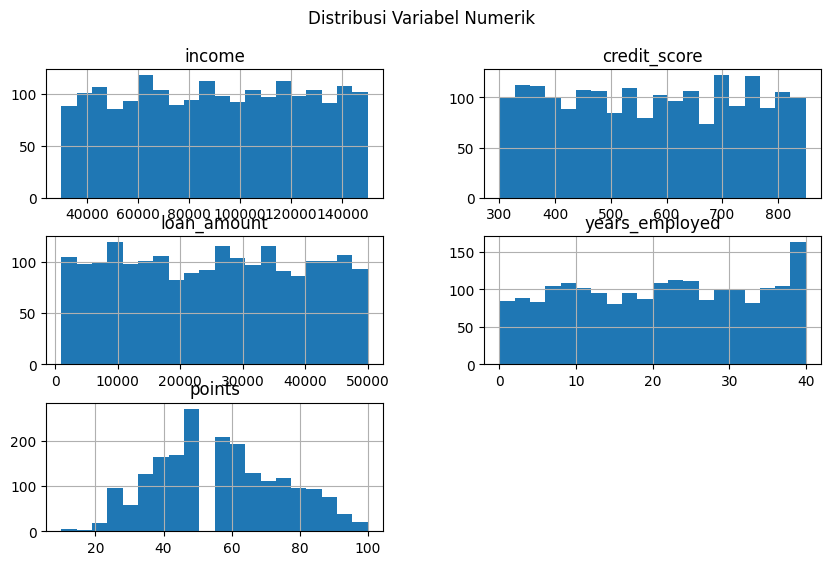

In [16]:
df[['income', 'credit_score', 'loan_amount', 'years_employed', 'points']].hist(bins=20, figsize=(10,6))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()


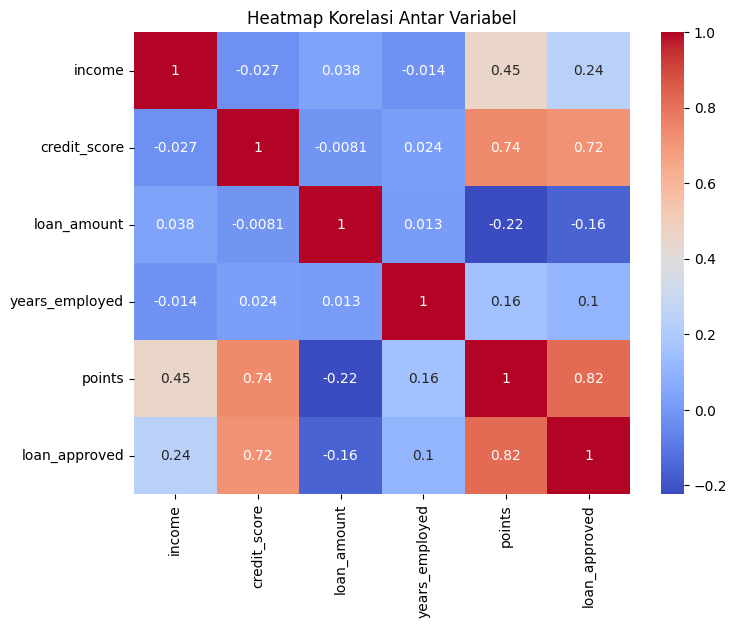

In [ ]:
corr = df[['income', 'credit_score', 'loan_amount', 
           'years_employed', 'points', 'loan_approved']].corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


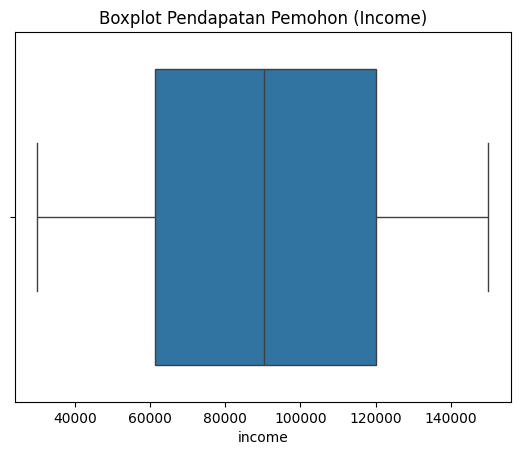

In [18]:
sns.boxplot(x=df['income'])
plt.title('Boxplot Pendapatan Pemohon (Income)')
plt.show()


In [19]:
# Hapus kolom non-predictive
df = df.drop(['name', 'city'], axis=1)

# Ubah nilai boolean menjadi numerik
df['loan_approved'] = df['loan_approved'].astype(int)


In [21]:
df.isna().sum()


income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

Akurasi Model: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       183

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



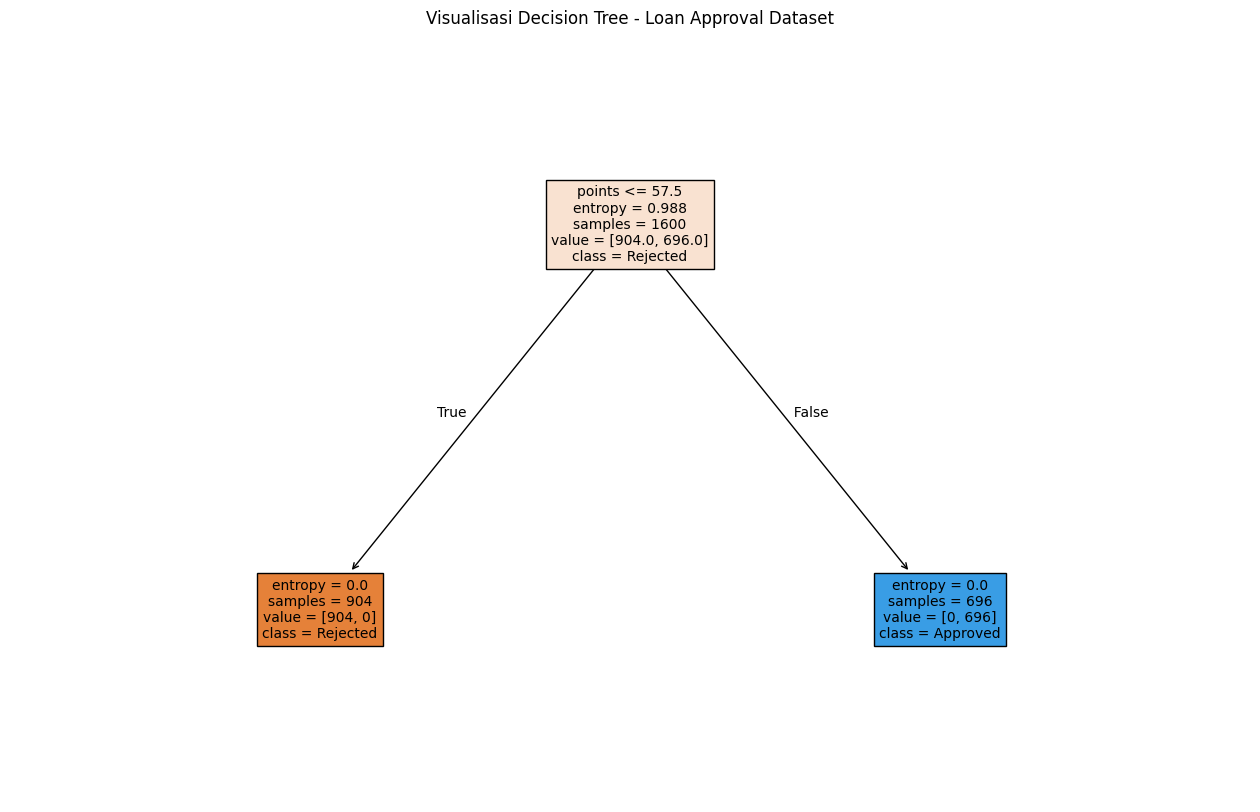

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

# Membagi data menjadi data latih dan data uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(16, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Rejected', 'Approved'], filled=True, fontsize=10)
plt.title("Visualisasi Decision Tree - Loan Approval Dataset")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_


{'max_depth': 3, 'min_samples_split': 2}


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[217   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       183

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

